Набор данных содержит записи о первом выпускном классе стартап-программы MBA, включая детали и баллы из их заявления, из самой программы и статус трудоустройства выпускников через 2 месяца. Каждая строка состоит из записей о каждом студенте: ID студента, степень бакалавра, оценка бакалавра, оценка MBA, опыт работы, трудоспособность (до), трудоспособность (после), статус занятости, годовая зарплата.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy.stats
import numpy as np
import seaborn as sns
import statsmodels.api as sm


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Maven Business School.xlsx', usecols = 'A:I')

In [3]:
df.shape

(1200, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              1200 non-null   int64  
 1   Undergrad Degree        1200 non-null   object 
 2   Undergrad Grade         1164 non-null   float64
 3   MBA Grade               1200 non-null   float64
 4   Work Experience         1200 non-null   object 
 5   Employability (Before)  1193 non-null   float64
 6   Employability (After)   1195 non-null   float64
 7   Status                  1200 non-null   object 
 8   Annual Salary           933 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 84.5+ KB


In [5]:
df

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.200,No,252.000000,276.0,Placed,111000
1,2,Business,62.1,92.800,No,423.000000,410.0,Not Placed,NaN
2,3,Computer Science,70.2,68.700,Yes,101.000000,119.0,Placed,107000
3,4,Engineering,75.1,80.700,No,288.000000,334.0,Not Placed,NaN
4,5,Finance,60.9,74.900,No,248.000000,252.0,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...
1195,1196,Business,32.5,30.875,Yes,167.323980,410.2,Placed,
1196,1197,Computer Science,32.8,31.160,No,167.238571,413.3,Placed,117666.666667
1197,1198,Engineering,33.1,31.445,No,167.153163,416.4,Not Placed,131666.666667
1198,1199,Finance,33.4,31.730,No,167.067755,419.5,Placed,


In [6]:
df['Undergrad Degree'].unique()

array(['Business', 'Computer Science', 'Engineering', 'Finance', 'Art'],
      dtype=object)

In [7]:
df[df['Status'] == 'Placed'].shape

(716, 9)

In [8]:
df[(df['Status'] == 'Placed') & (df['Work Experience'] == 'No')].shape

(588, 9)

In [9]:
df['Annual Salary']

0              111000
1                 NaN
2              107000
3                 NaN
4                 NaN
            ...      
1195                 
1196    117666.666667
1197    131666.666667
1198                 
1199                 
Name: Annual Salary, Length: 1200, dtype: object

In [10]:
df['Annual Salary'] = pd.to_numeric(df['Annual Salary'], errors='coerce')
#формула заимствована с сайта www.statology.org

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              1200 non-null   int64  
 1   Undergrad Degree        1200 non-null   object 
 2   Undergrad Grade         1164 non-null   float64
 3   MBA Grade               1200 non-null   float64
 4   Work Experience         1200 non-null   object 
 5   Employability (Before)  1193 non-null   float64
 6   Employability (After)   1195 non-null   float64
 7   Status                  1200 non-null   object 
 8   Annual Salary           687 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 84.5+ KB


In [12]:
df['Annual Salary'].sort_values(ascending=False)

935     470333.333333
337     470333.333333
239     470333.333333
1073    470333.333333
541     470333.333333
            ...      
1192              NaN
1193              NaN
1195              NaN
1198              NaN
1199              NaN
Name: Annual Salary, Length: 1200, dtype: float64

In [13]:
df['Total Grade'] = df['Undergrad Grade'] + df['MBA Grade']

In [14]:
df.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary,Total Grade
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000.0,158.6
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,NaN,154.9
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000.0,138.9
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,NaN,155.8
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,NaN,135.8


In [15]:
df.sort_values(by=['Total Grade'], ascending = False).head(20)

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary,Total Grade
166,167,Computer Science,100.00,95.000,No,255.208980,596.623120,Placed,NaN,195.000
1138,1139,Finance,99.90,94.905,No,172.192245,268.800000,Placed,103500.000000,194.805
424,425,Art,99.80,94.810,No,233.173673,228.900000,Not Placed,NaN,194.610
929,930,Art,99.70,94.715,No,190.042551,306.000000,Not Placed,126333.333333,194.415
685,686,Business,99.60,94.620,Yes,210.882143,206.000000,Placed,NaN,194.220
264,265,Art,99.50,94.525,No,246.838980,286.800000,Not Placed,NaN,194.025
1137,1138,Engineering,99.30,94.335,No,172.277653,265.900000,Not Placed,NaN,193.635
683,684,Finance,99.24,94.278,No,211.052959,291.000000,Placed,107000.000000,193.518
928,929,Finance,99.00,94.050,No,190.127959,196.000000,Placed,NaN,193.050
684,685,Art,98.70,93.765,No,210.967551,368.000000,Not Placed,NaN,192.465


In [16]:
df['Work Experience'].apply(lambda x: 1 if x == 'Yes' else 0).sum()

134

In [17]:
df['Work Experience'] = df['Work Experience'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Placed' else 0)

In [20]:
df

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary,Total Grade
0,1,Business,68.4,90.200,0,252.000000,276.0,1,111000.000000,158.600
1,2,Business,62.1,92.800,0,423.000000,410.0,0,NaN,154.900
2,3,Computer Science,70.2,68.700,1,101.000000,119.0,1,107000.000000,138.900
3,4,Engineering,75.1,80.700,0,288.000000,334.0,0,NaN,155.800
4,5,Finance,60.9,74.900,0,248.000000,252.0,0,NaN,135.800
...,...,...,...,...,...,...,...,...,...,...
1195,1196,Business,32.5,30.875,1,167.323980,410.2,1,NaN,63.375
1196,1197,Computer Science,32.8,31.160,0,167.238571,413.3,1,117666.666667,63.960
1197,1198,Engineering,33.1,31.445,0,167.153163,416.4,0,131666.666667,64.545
1198,1199,Finance,33.4,31.730,0,167.067755,419.5,1,NaN,65.130


**Работа с пропущенными значениями**

In [21]:
df.isna().sum()

Student ID                  0
Undergrad Degree            0
Undergrad Grade            36
MBA Grade                   0
Work Experience             0
Employability (Before)      7
Employability (After)       5
Status                      0
Annual Salary             513
Total Grade                36
dtype: int64

In [22]:
type(df[df['Undergrad Grade'].isna()]['Undergrad Grade'][425])

numpy.float64

In [23]:
df['Annual Salary'] = df['Annual Salary'].fillna(0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              1200 non-null   int64  
 1   Undergrad Degree        1200 non-null   object 
 2   Undergrad Grade         1164 non-null   float64
 3   MBA Grade               1200 non-null   float64
 4   Work Experience         1200 non-null   int64  
 5   Employability (Before)  1193 non-null   float64
 6   Employability (After)   1195 non-null   float64
 7   Status                  1200 non-null   int64  
 8   Annual Salary           1200 non-null   float64
 9   Total Grade             1164 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 93.9+ KB


In [25]:
df['Undergrad Grade'] = df['Undergrad Grade'].fillna(df['Undergrad Grade'].median())

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              1200 non-null   int64  
 1   Undergrad Degree        1200 non-null   object 
 2   Undergrad Grade         1200 non-null   float64
 3   MBA Grade               1200 non-null   float64
 4   Work Experience         1200 non-null   int64  
 5   Employability (Before)  1193 non-null   float64
 6   Employability (After)   1195 non-null   float64
 7   Status                  1200 non-null   int64  
 8   Annual Salary           1200 non-null   float64
 9   Total Grade             1164 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 93.9+ KB


In [27]:
df['Total Grade'] = df['Undergrad Grade'] + df['MBA Grade']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              1200 non-null   int64  
 1   Undergrad Degree        1200 non-null   object 
 2   Undergrad Grade         1200 non-null   float64
 3   MBA Grade               1200 non-null   float64
 4   Work Experience         1200 non-null   int64  
 5   Employability (Before)  1193 non-null   float64
 6   Employability (After)   1195 non-null   float64
 7   Status                  1200 non-null   int64  
 8   Annual Salary           1200 non-null   float64
 9   Total Grade             1200 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 93.9+ KB


In [29]:
Employabilitybefore_random = np.random.choice(df['Employability (Before)'].dropna(), 1200)

In [30]:
df['Employability (Before)'] = df['Employability (Before)'].fillna(pd.Series(Employabilitybefore_random))

In [31]:
Employabilityafter_random = np.random.choice(df['Employability (After)'].dropna(), 1200)

In [32]:
df['Employability (After)'] = df['Employability (After)'].fillna(pd.Series(Employabilityafter_random))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              1200 non-null   int64  
 1   Undergrad Degree        1200 non-null   object 
 2   Undergrad Grade         1200 non-null   float64
 3   MBA Grade               1200 non-null   float64
 4   Work Experience         1200 non-null   int64  
 5   Employability (Before)  1200 non-null   float64
 6   Employability (After)   1200 non-null   float64
 7   Status                  1200 non-null   int64  
 8   Annual Salary           1200 non-null   float64
 9   Total Grade             1200 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 93.9+ KB


### 1. Продвинутая визуализация

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df.head(20)

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary,Total Grade
0,1,Business,68.4,90.2,0,252.0,276.0,1,111000.0,158.6
1,2,Business,62.1,92.8,0,423.0,410.0,0,0.0,154.9
2,3,Computer Science,70.2,68.7,1,101.0,119.0,1,107000.0,138.9
3,4,Engineering,75.1,80.7,0,288.0,334.0,0,0.0,155.8
4,5,Finance,60.9,74.9,0,248.0,252.0,0,0.0,135.8
5,6,Computer Science,74.5,80.7,0,145.0,209.0,0,0.0,155.2
6,7,Finance,76.4,83.3,0,401.0,462.0,1,109000.0,159.7
7,8,Business,82.6,88.7,0,287.0,342.0,1,148000.0,171.3
8,9,Finance,76.9,75.4,0,275.0,347.0,1,255500.0,152.3
9,10,Computer Science,83.3,82.1,0,254.0,313.0,1,103500.0,165.4


<AxesSubplot:xlabel='MBA Grade', ylabel='Density'>

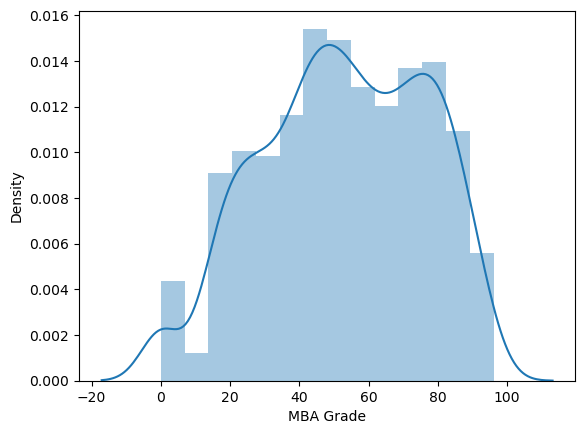

In [39]:
sns.distplot(df['MBA Grade'])

In [40]:
df['Work Experience'].value_counts()

0    1066
1     134
Name: Work Experience, dtype: int64

<AxesSubplot:ylabel='Work Experience'>

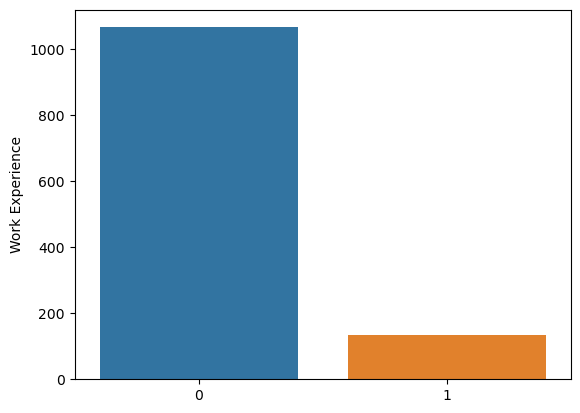

In [41]:
sns.barplot(x=df['Work Experience'].value_counts().index, y=df['Work Experience'].value_counts())

В нашей выборке у большинства студентов нет опыта работы

<AxesSubplot:xlabel='Status', ylabel='Work Experience'>

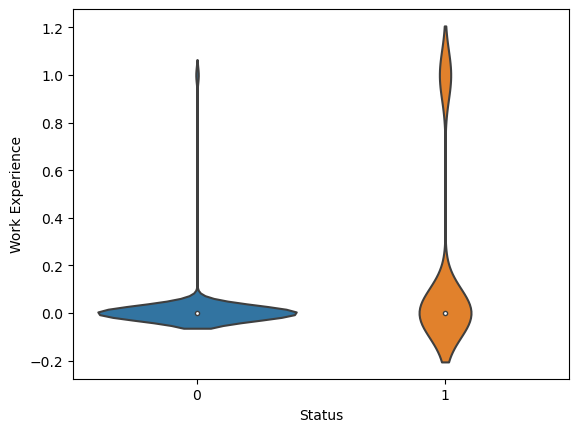

In [43]:
sns.violinplot(x=df['Status'], y=df['Work Experience'])

Из скрипичного графика видно, что среди тех, у кого есть работа(Status=1), пик значений приходится на отсутствия опыта работы(Work Experience=0), следовательно в данной выборке опыт работы не влиял на трудоустройство студентов

<AxesSubplot:xlabel='Work Experience', ylabel='Undergrad Degree'>

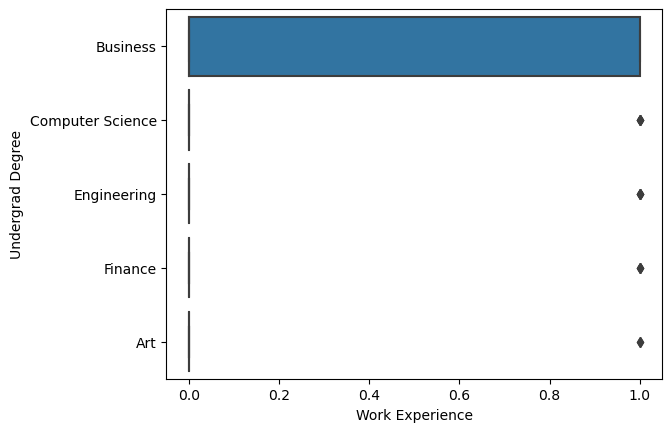

In [44]:
sns.boxplot(x=df['Work Experience'], y=df['Undergrad Degree'])

Опыт работы есть в основном у студентов, которые получили степень бакалавра в бизнесе

In [45]:
num_features = ['Undergrad Grade','MBA Grade', 'Employability (Before)', 'Employability (After)', 'Annual Salary']

In [46]:
correlation = df.corr().loc[num_features, num_features]
correlation

,Undergrad Grade,MBA Grade,Employability (Before),Employability (After),Annual Salary
Undergrad Grade,1.000000,0.905451,0.114207,0.074759,-0.037565
MBA Grade,0.905451,1.000000,0.161873,0.080254,-0.050304
Employability (Before),0.114207,0.161873,1.000000,0.298670,0.061750
Employability (After),0.074759,0.080254,0.298670,1.000000,-0.015405
Annual Salary,-0.037565,-0.050304,0.061750,-0.015405,1.000000


<AxesSubplot:>

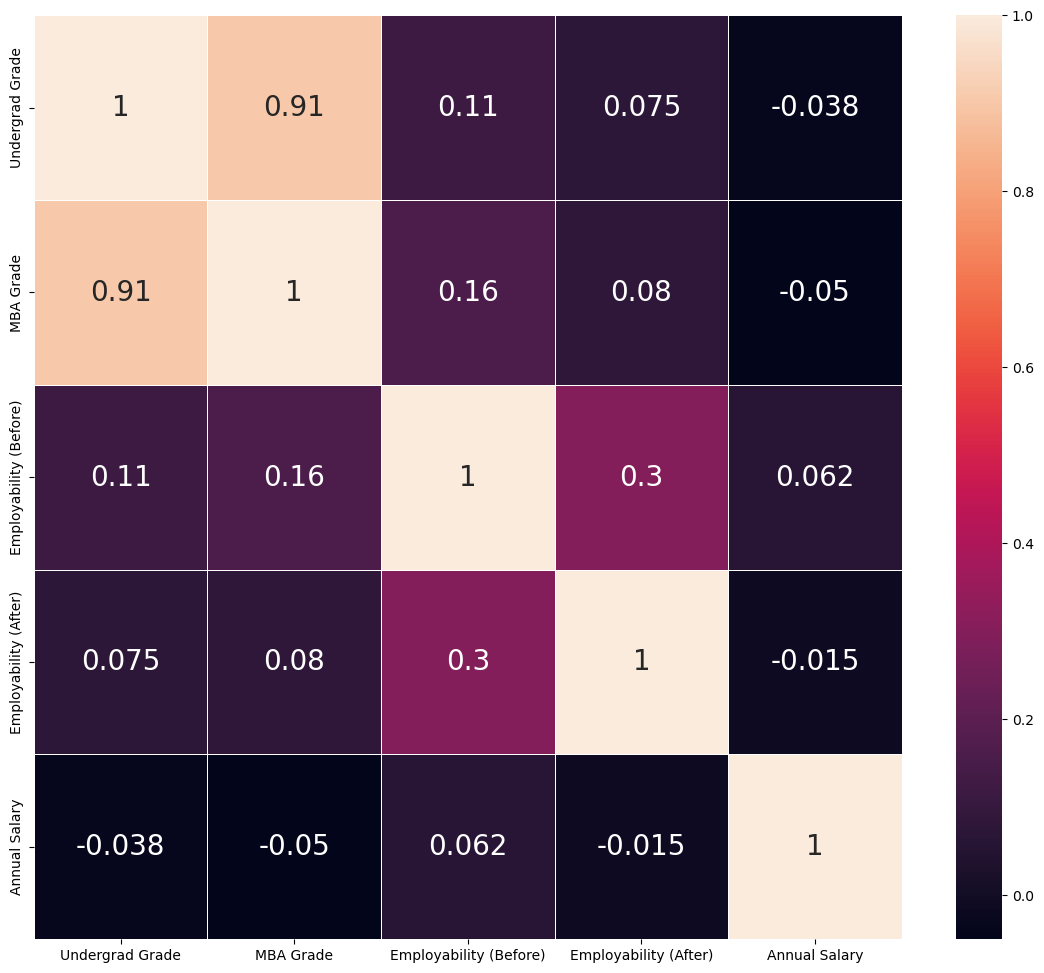

In [47]:
fig, ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, annot=True, linecolor='white', linewidth=0.5, annot_kws = {'size':20})

### 2. Непараметрические параметры тестирования гипотез

In [50]:
df.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary,Total Grade
0,1,Business,68.4,90.2,0,252.0,276.0,1,111000.0,158.6
1,2,Business,62.1,92.8,0,423.0,410.0,0,0.0,154.9
2,3,Computer Science,70.2,68.7,1,101.0,119.0,1,107000.0,138.9
3,4,Engineering,75.1,80.7,0,288.0,334.0,0,0.0,155.8
4,5,Finance,60.9,74.9,0,248.0,252.0,0,0.0,135.8


Задаем уровень alpha = 1 %

In [49]:
alpha = 0.01

Создаем таблицу сопряженности

In [52]:
ct_o = df.groupby('Work Experience')['Status'].value_counts().unstack()
ct_o

Status,0,1
Work Experience,,
0,478,588
1,6,128


In [56]:
dof = (2 - 1)*(2 - 1)
print(dof)
critical_value = 6.63

1


In [57]:
n_total = ct_o.sum().sum()
n_total

1200

In [62]:
n_target_0 = ct_o[0].sum()
n_target_1 = ct_o[1].sum()
print(n_target_0, n_target_1)

484 716


In [63]:
p_target_0 = n_target_0 / n_total
p_target_1 = n_target_1 / n_total
print(p_target_0, p_target_1)

0.4033333333333333 0.5966666666666667


In [64]:
num_no_work_experience = ct_o.iloc[0].sum()
num_work_experience = ct_o.iloc[1].sum()
print(num_no_work_experience, num_work_experience)

1066 134


In [65]:
f_target_0_0 = num_no_work_experience * p_target_0
f_target_0_1 = num_no_work_experience * p_target_1
print(f_target_0_0, f_target_0_1)

429.9533333333333 636.0466666666666


In [66]:
f_target_1_0 = num_work_experience * p_target_0
f_target_1_1 = num_work_experience * p_target_1
print(f_target_1_0, f_target_1_1)

54.04666666666667 79.95333333333333


In [67]:
ct_e = np.array([[f_target_0_0, f_target_0_1],
                 [f_target_1_0, f_target_1_1]])
print(ct_e)

[[429.95333333 636.04666667]
 [ 54.04666667  79.95333333]]


In [71]:
chi_square = ((ct_o - ct_e)**2 / ct_e).sum().sum()
chi_square

80.58419597974361

In [73]:
print(chi_square, critical_value)
print(chi_square > critical_value)

80.58419597974361 6.63
True


Так как хи-квадрат больше критического значения, мы отвергаем нулевую гипотезу о независимости опыта работы и трудоустройства, следовательно, с большей долей вероятности (что в принципе соответветствует здравому смыслу) опыт работы влияет на трудоустройство

##### проведем те же вычисления при помощи библиотеки scipy

In [76]:
scipy.stats.chi2_contingency(ct_o, correction = False)

(80.58419597974361,
 2.7857860085284057e-19,
 1,
 array([[429.95333333, 636.04666667],
        [ 54.04666667,  79.95333333]]))

In [75]:
ct_e

array([[429.95333333, 636.04666667],
       [ 54.04666667,  79.95333333]])

Как можно убедиться, вычисления были проведены верно

### 3. Параметрические критерии для тестирования гипотезы

Проверим две переменные:
1. наличие опыта работы
2. оценка бакалавра

* Двусторонний тест
* alpha = 0.05

In [79]:
work_exp = df[df['Work Experience'] == 1]
no_work_exp = df[df['Work Experience'] == 0]

<AxesSubplot:>

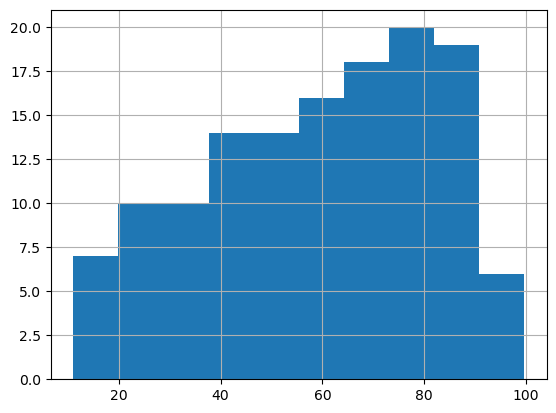

In [81]:
work_exp['Undergrad Grade'].hist()

<AxesSubplot:>

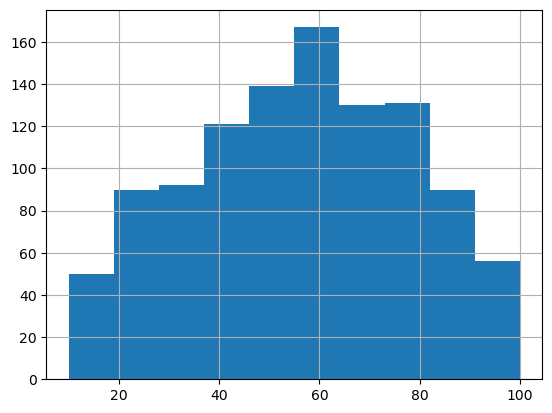

In [82]:
no_work_exp['Undergrad Grade'].hist()

In [83]:
print(work_exp['Undergrad Grade'].var())
print(no_work_exp['Undergrad Grade'].var())

493.40659652676464
481.0306499767463


In [84]:
n1 = len(work_exp)
n2 = len(no_work_exp)
var1 = work_exp['Undergrad Grade'].var()
var2 = no_work_exp['Undergrad Grade'].var()

print(n1,n2,var1,var2)

134 1066 493.40659652676464 481.0306499767463


In [86]:
v1 = var1 / n1
v2 = var2 / n2

print(v1, v2)

3.6821387800504826 0.45124826451852373


In [88]:
dof_welch = (v1 + v2)**2 / (v1**2/(n1 - 1) + v2**2/(n2 - 1))
print(int(dof_welch))

167


In [100]:
t_critical = 1.9667

def hypothesis_check(t, t_critical):
    if abs(t) > t_critical:
        print('Гипотеза Н0 отвергается. Разница между средними статистически значима.')
    else:
        print('Гипотеза H0 не отвергается.')

In [92]:
s = np.sqrt(v1 + v2)
print(s)

2.033073300343351


In [93]:
mean1 = work_exp['Undergrad Grade'].mean()
mean2 = no_work_exp['Undergrad Grade'].mean()
print (mean1, mean2)

59.025298507462786 56.26278611632283


In [95]:
t = (mean1 - mean2)/s
print(t)

1.3587864198862953


In [101]:
hypothesis_check(t, t_critical)

Гипотеза H0 не отвергается.


Следовательно получаем, что наличие опыта работы в среднем не сильно влияет на уровень оценок.

In [103]:
scipy.stats.ttest_ind_from_stats(mean1, np.sqrt(var1), n1,
                                 mean2, np.sqrt(var2), n2,
                                equal_var = False)

Ttest_indResult(statistic=1.3587864198862953, pvalue=0.17604358895380134)

In [105]:
CI_low = (mean1 - mean2) - t_critical*s
CI_high = (mean1 - mean2) + t_critical*s

print(CI_low)
print(CI_high)


-1.2359328686453113
6.760957650925225


Проведя сравнение параметров через функции scipy убеждаемся, что расчеты проведены верно, получили аналогичный вывод, сделанный ранее.

### 3. Линейная регрессия

Для построения линейной регрессии возьмем столбцы **Annual Salary**, **Undergrad Grade**, **MBA Grade**, **Employability (Before)**, **Employability (After)**

In [113]:
df1 = df[['Annual Salary', 'Undergrad Grade', 'MBA Grade', 'Employability (Before)', 'Employability (After)']]
df1 = df1[df1['Annual Salary'] != 0]
df1

,Annual Salary,Undergrad Grade,MBA Grade,Employability (Before),Employability (After)
0,111000.000000,68.4,90.200,252.000000,276.0
2,107000.000000,70.2,68.700,101.000000,119.0
6,109000.000000,76.4,83.300,401.000000,462.0
7,148000.000000,82.6,88.700,287.000000,342.0
8,255500.000000,76.9,75.400,275.000000,347.0
...,...,...,...,...,...
1187,139000.000000,30.1,28.595,168.007245,385.4
1190,168333.333333,31.0,29.450,167.751020,394.7
1194,149000.000000,32.2,30.590,167.409388,407.1
1196,117666.666667,32.8,31.160,167.238571,413.3


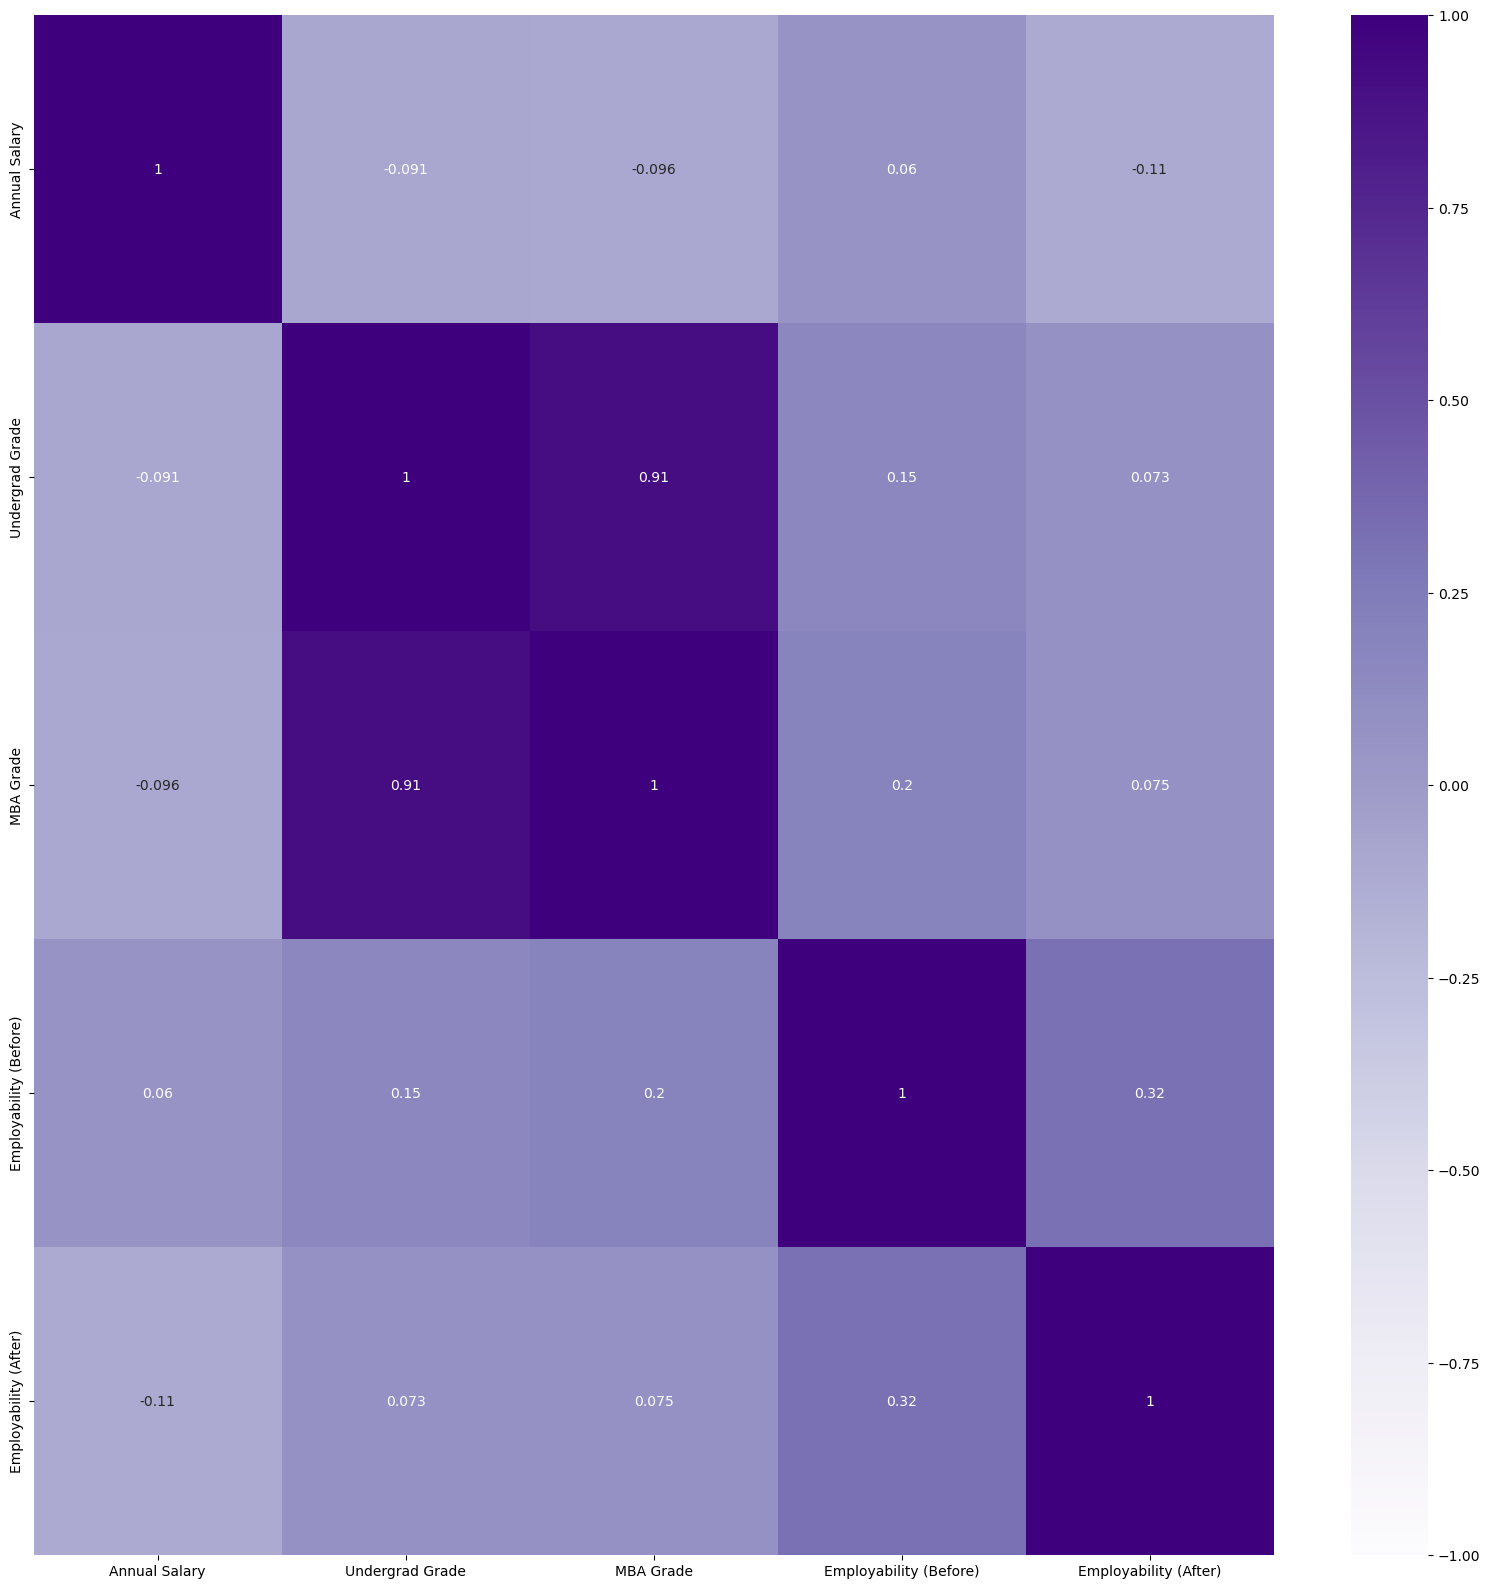

In [117]:
plt.figure(figsize = (20,20))
p = sns.heatmap(df1.corr(), annot = True, cmap = 'Purples', vmin = -1, vmax = 1)

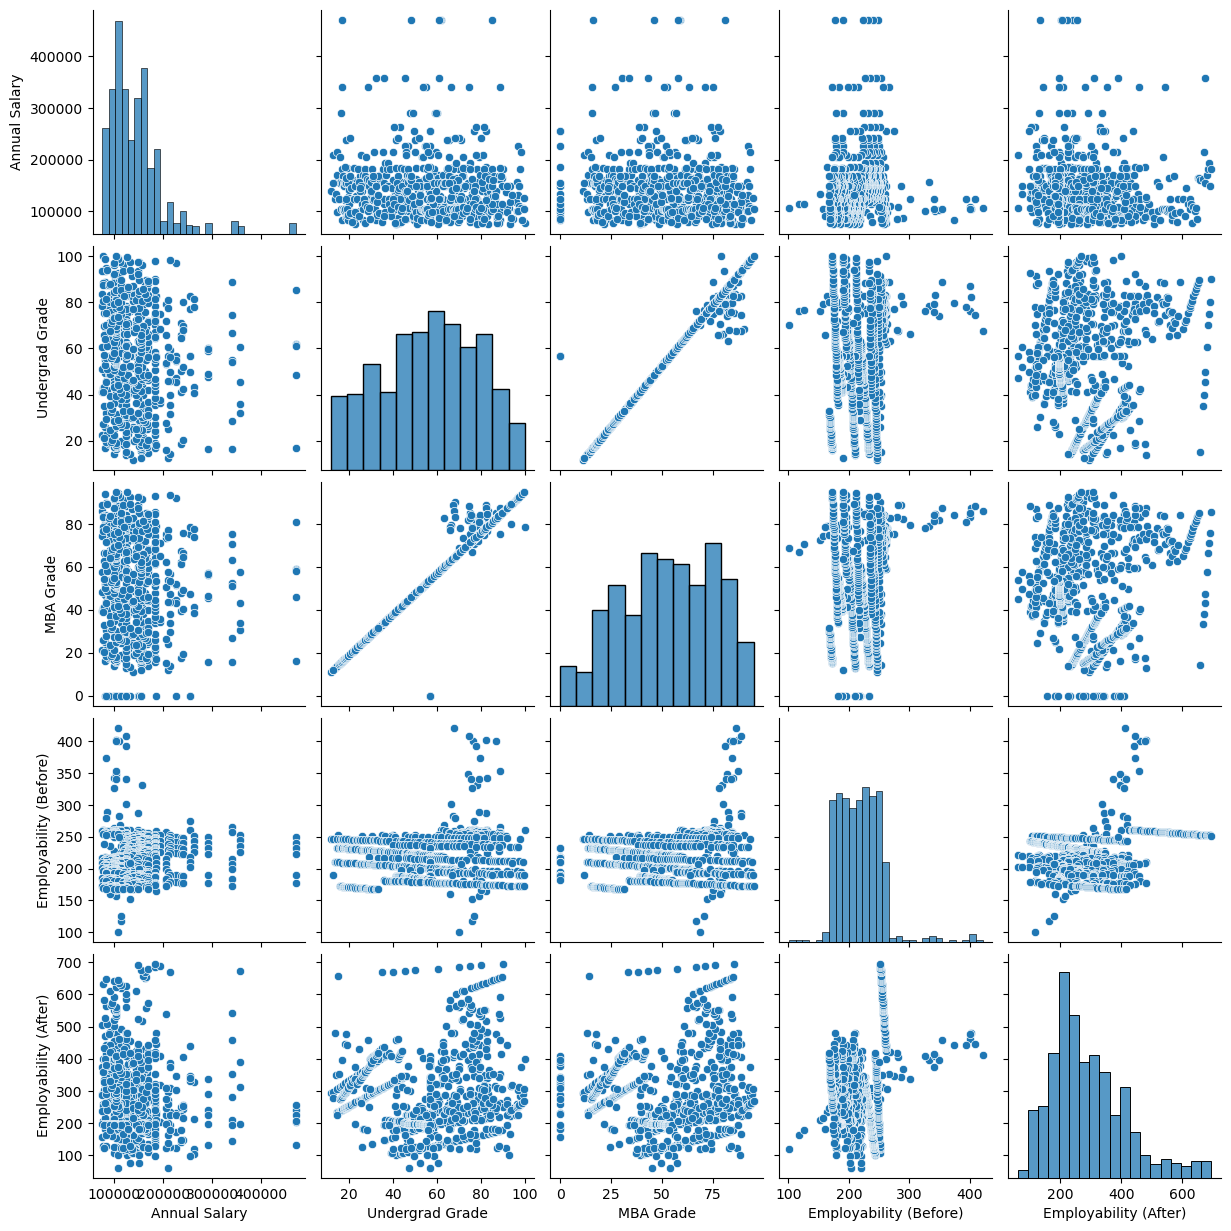

In [118]:
sns.pairplot(df1)

In [125]:
X = df1['Annual Salary']
y1 = df1['Undergrad Grade']
y2 = df1['MBA Grade']
y3 = df1['Employability (Before)']
y4 = df1['Employability (After)']

res1 = scipy.stats.linregress(X, y1)
res2 = scipy.stats.linregress(X, y2)
res3 = scipy.stats.linregress(X, y3)
res4 = scipy.stats.linregress(X, y4)

print(res1)
print(res2)
print(res3)
print(res4)

LinregressResult(slope=-3.4719067070289485e-05, intercept=61.549874957583235, rvalue=-0.0912544288549571, pvalue=0.01673498645070381, stderr=1.4476146617810688e-05, intercept_stderr=2.2505169647283094)
LinregressResult(slope=-3.8646001203468236e-05, intercept=58.10437554630573, rvalue=-0.09580214878046034, pvalue=0.011996480278855502, stderr=1.534199498165717e-05, intercept_stderr=2.3851250536876525)
LinregressResult(slope=3.763380904034893e-05, intercept=212.31928755822312, rvalue=0.05967885358150519, pvalue=0.11810712225884469, stderr=2.4051250114878174e-05, intercept_stderr=3.7390990734966105)
LinregressResult(slope=-0.00023862645471670112, intercept=326.19439071769557, rvalue=-0.11053128945713822, pvalue=0.003723092620501926, stderr=8.198205568836229e-05, intercept_stderr=12.745243054043042)


In [126]:
r_sq1 = res1.rvalue ** 2
r_sq2 = res2.rvalue ** 2
r_sq3 = res3.rvalue ** 2
r_sq4 = res4.rvalue ** 2

print(r_sq1)
print(r_sq2)
print(r_sq3)
print(r_sq4)

0.008327370785644427
0.009178051710953459
0.0035615655648027346
0.012217165949057675


По результату выше видно, что коэффициенты детерминации очень малы, что указывает на то, что данные параметры слабо объясняют дисперсию в целевой переменной, а значит оценки не коррелируют с заработной платой.

### 4. Логистическая регрессия

In [127]:
cols_num = ['Undergrad Grade', 'MBA Grade', 'Employability (Before)', 'Employability (After)']

In [151]:
X = sm.add_constant(df['Work Experience'])
y = df['Status']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.631425
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1198
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                 0.06364
Time:                        23:00:35   Log-Likelihood:                -757.71
converged:                       True   LL-Null:                       -809.21
Covariance Type:            nonrobust   LLR p-value:                 3.356e-24
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2071      0.062      3.363      0.001       0.086       0.328
Work Experienc

In [148]:
np.exp(0.2071)

1.3346912610830701

In [152]:
np.exp(2.8532)

17.343191350390402

Данная модель показывает, что в случае, когда есть опыт работы, то вероятность наличия работы к ее отсутствию соотносится как 17:1. В случае же, когда опыт работы отсутсвует, это не сильно сказывается, на трудоустройстве.

In [156]:
df1 = df[['Undergrad Grade', 'MBA Grade', 'Employability (Before)', 'Employability (After)']]
X = sm.add_constant(df1)
y = df['Status']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.672271
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                0.003068
Time:                        23:07:49   Log-Likelihood:                -806.73
converged:                       True   LL-Null:                       -809.21
Covariance Type:            nonrobust   LLR p-value:                    0.2909
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1693      0.382     -0.443      0.658      -0.918      

в данной модели видно, что эти регрессероры нельзя считать статистически значимыми. Они слабо объясняют трудоустройство студентов выпускного курса первого набора стартап-программы MBA. Что говорит о том, что оценки не влияют на трудоустройство, а также в подтверждение, аналогичный результат был получен ранее.